# Support Vector Regression

**Importing the Libraries**

In [1]:
# Numpy allows us to work with array.
import numpy as np

# Maptplotlib which allows us to plot some chart.
import matplotlib.pyplot as plt

# Pandas allows us to not only import the datasets but also create the matrix of features(independent) and 
# dependent variable.
import pandas as pd

**Importing the Dataset**

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")

- The independent variable usally in the first columns of dataset and dependent variable usally in the last columns of the data sets.
- X is Independent Variable.
- Y is Dependent Variable.

In [3]:
x = dataset.iloc[:, 1:-1].values      # iloc is index of location
y = dataset.iloc[:, -1].values

print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


- Making Y into 2D array, because the standard scale call that will perform standardization expect one unique format.

In [5]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


**Feature Scaling**

In [6]:
# Importing Package
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [7]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


**Training the SRV Model on the whole dataset**

In [8]:
# Importing Package
from sklearn.svm import SVR

reg = SVR(kernel = "rbf")

# Fitting
reg.fit(x, y)

c:\users\dhairya\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

**Predicting a new Results.**

In [9]:
# Reversing the scalling of y.
sc_y.inverse_transform(reg.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

**Visualising the SRV results.**

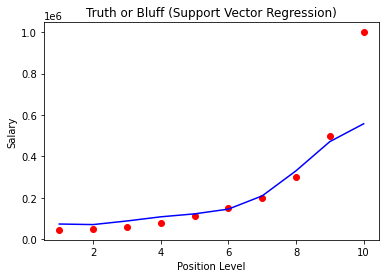

In [10]:
# Real Salaries.
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = "red")

# Predicted of SVR Model.
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(reg.predict(x)), color = "blue")

plt.title("Truth or Bluff (Support Vector Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

**Visualising the SRV result (for higher resolution and smoother curve)**

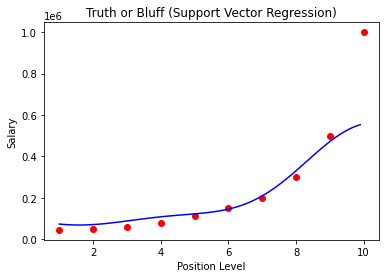

In [11]:
# Increaing the density
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)

# Plotting
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = "red")
plt.plot(x_grid, sc_y.inverse_transform(reg.predict(sc_x.transform(x_grid))), color = 'blue')

plt.title("Truth or Bluff (Support Vector Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()